In [1]:
import numpy as np
import matplotlib.pylab as plt
import math
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
import scipy.io
import RLS
f = scipy.io.loadmat('RLS_DATA.mat')
delay = 300
vars = f.keys()

In [2]:
data_size = f.get("RX_I").size

RX_Q_data = f.get("RX_Q")
RX_I_data = f.get("RX_I")
TX_Q_data = f.get("TX_Q")
TX_I_data = f.get("TX_I")

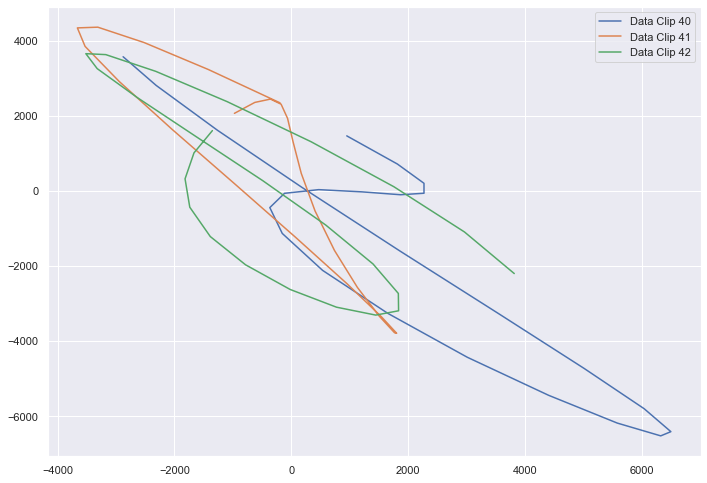

In [3]:
est_per = 25
num_test = 3
inital_clip = 40
end_clip = inital_clip+num_test

line_refernce = np.linspace(0,est_per,est_per)

for i in range (inital_clip,end_clip):
    plt.plot(TX_Q_data[i*est_per:(i+1)*(est_per)],RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay],    label='Data Clip {}'.format(i))  

#plt.step(line_refernce,np.squeeze(every_pure_input).T[0:test_size][0],label='Pure_Input')      
#plt.step(line_refernce, every_input[0:test_size],label='Curropted Signal') 
#plt.step(line_refernce,every_input[0:test_size],label='Input Signals After The Channels')       
plt.legend()

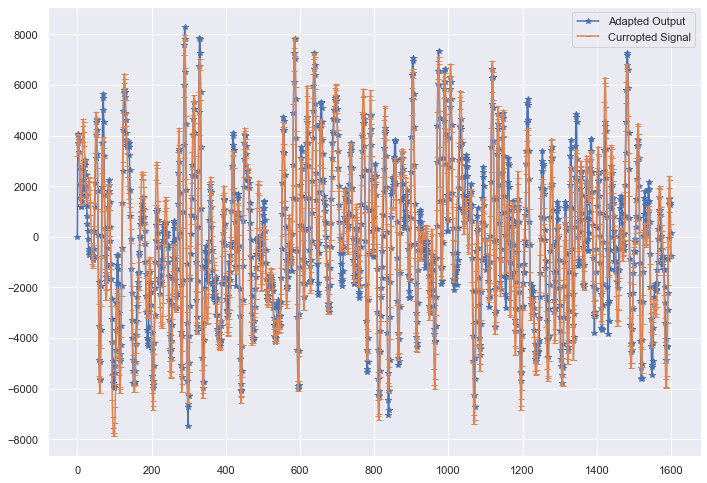

In [8]:
est_per= 1600
i= 2
lam = 0.95
#Optimum value for 1600 data lam=0.90

mem_len =5

test_size = len(TX_Q_data[i*est_per:(i+1)*(est_per)])
deg =1
num_vars =deg*mem_len
prediction = [1]
LS_2 = RLS.RLS_Filter(num_vars,lam,1)

pred_e, pred_output,_,weight = RLS.one_batch(test_size = test_size, deg = deg, mem_len = mem_len ,prediction = prediction,LS_2= LS_2 ,input_data=TX_Q_data[i*est_per:(i+1)*(est_per)],reference_data=RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay])

ref = RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay]
line_refernce = np.reshape(np.linspace(0,test_size,test_size),(test_size,1)) 
out = np.reshape((np.squeeze(pred_output)[0:test_size]),(test_size,1))
plt.plot(line_refernce,out[0:test_size],marker = '*',label='Adapted Output')       
plt.plot(line_refernce,ref[0:test_size],marker = '_',label='Curropted Signal') 
plt.legend()

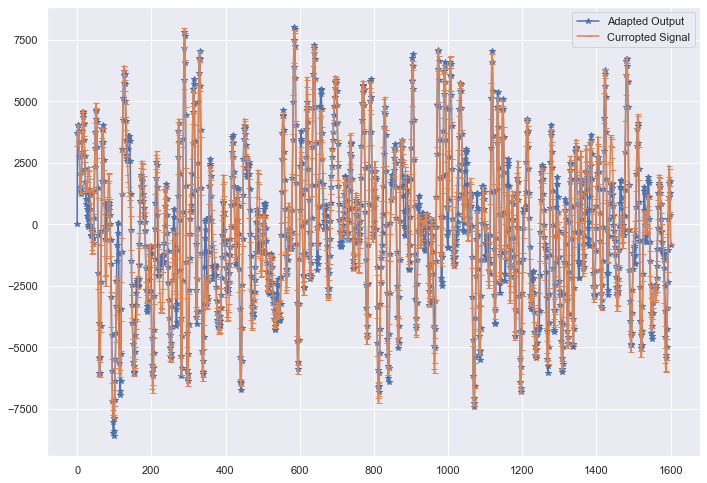

In [17]:
est_per= 1600
i= 2
lam = 0.91
#Optimum value for 1600 data lam=0.90

mem_len =6

test_size = len(TX_Q_data[i*est_per:(i+1)*(est_per)])
deg =1
num_vars =deg*mem_len
prediction = [1]
LS_2 = RLS.RLS_Filter(num_vars,lam,1)

pred_e, pred_output,_,weight = RLS.one_batch(test_size = test_size, deg = deg, mem_len = mem_len ,prediction = prediction,LS_2= LS_2 ,input_data=TX_Q_data[i*est_per:(i+1)*(est_per)],reference_data=RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay])

ref = RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay]
line_refernce = np.reshape(np.linspace(0,test_size,test_size),(test_size,1)) 
out = np.reshape((np.squeeze(pred_output)[0:test_size]),(test_size,1))
plt.plot(line_refernce,out[0:test_size],marker = '*',label='Adapted Output')       
plt.plot(line_refernce,ref[0:test_size],marker = '_',label='Curropted Signal') 
plt.legend()


---------------------------------
---------------------------------

7961 <    Range   < -7870
Maximum range of the reference 15831
The count of the difference which are larger than |2500| --> || 11 ||  Ratio '%' :    0 //This range is  %: 15.79180089697429
The count of the difference which are less   than |1000|  --> || 1154 ||  Ratio '%' :    72 //This range is %: 6.316720358789716
Sample Size 1600

---------------------------------
---------------------------------

*****RMS Error -->  1047.6156473971623
*****Normalized RMS Error  %--> 6.617495088100324

---------------------------------
---------------------------------


Text(0.5, 1.0, '||   The Error Distribution   || (with avarage output value of   15831)')

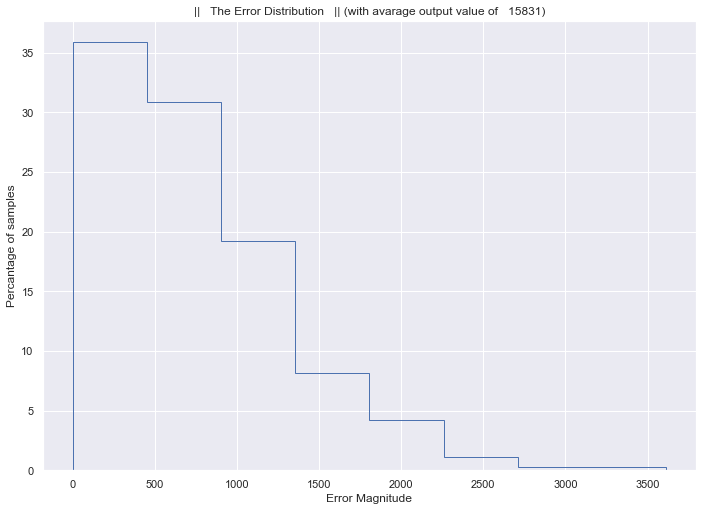

In [9]:
high_end = 2500
low_end =  1000
condition_1 = np.logical_or(np.greater(out-ref, high_end ), np.less(out-ref, -high_end )) 
condition_2 = np.logical_and(np.less(out-ref, low_end), np.greater(out-ref, -low_end)) 

dif = (out[0:test_size])-(ref[0:test_size])
range_dif = (np.max(ref)-np.min(ref))

print("\n---------------------------------")
print("---------------------------------\n")

print(np.max(ref),"<    Range   <",np.min(ref))
print("Maximum range of the reference",(np.max(ref))-(np.min(ref)))
print("The count of the difference which are larger than |{}| --> ||".format(high_end), np.count_nonzero(np.extract(out-ref,condition_1)),   "||  Ratio '%' :   ",int(100*np.count_nonzero(np.extract(out-ref,condition_1))/len(out-ref)), "//This range is  %:", 100*high_end/range_dif)
print("The count of the difference which are less   than |{}|  --> ||".format(low_end), np.count_nonzero(np.extract(out-ref,condition_2)),   "||  Ratio '%' :   ",int(100*np.count_nonzero(np.extract(out-ref,condition_2))/len(out-ref)), "//This range is %:", 100*low_end/range_dif)
print("Sample Size", len(out-ref))

print("\n---------------------------------")
print("---------------------------------")

rms_error = (np.sum(dif**2)/(test_size-delay+1))**0.5
print("\n*****RMS Error --> ", rms_error)
print("*****Normalized RMS Error  %-->",100*rms_error/range_dif)

print("\n---------------------------------")
print("---------------------------------")

counts, bins = np.histogram(np.abs(dif),8)
plt.stairs(counts/test_size*100, bins)
plt.xlabel("Error Magnitude")
plt.ylabel("Percantage of samples")
plt.title("||   The Error Distribution   || (with avarage output value of   {})".format(range_dif))

Avarege difference / Max Range of data  ==> %3.6733460200204977
Avarage difference between adapted input and reference data ==> 581.527408429445


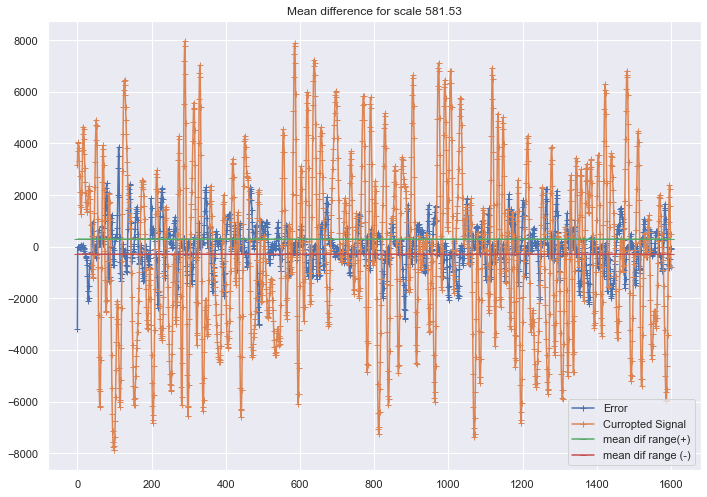

In [13]:
line_refernce = np.linspace(0,len(dif),len(dif)) 
plt.plot(line_refernce,dif,marker="+",label='Error') 
line_refernce = np.linspace(0,test_size,test_size) 
plt.plot(line_refernce,RX_Q_data[delay+i*est_per:(i+1)*(est_per)+delay],marker="+",label='Curropted Signal') 
plt.plot(line_refernce,np.linspace(np.average(np.abs(dif)/2),np.average(np.abs(dif)/2),test_size),marker="_",label="mean dif range(+)")
plt.plot(line_refernce,np.linspace(-np.average(np.abs(dif)/2),-np.average(np.abs(dif)/2),test_size),marker="_",label="mean dif range (-)")
plt.title("Mean difference for scale %.2f"  %(np.average(np.abs(dif))))
plt.legend()
print("Avarege difference / Max Range of data  ==> %{}".format(100*np.average(np.abs(dif))/range_dif))
print("Avarage difference between adapted input and reference data ==> {}".format(np.average(np.abs(dif))))

RMS Error -->  897.3288762017088
7961 <    Range   < -7870
Normalized RMS Error  --> 5.668175580833231


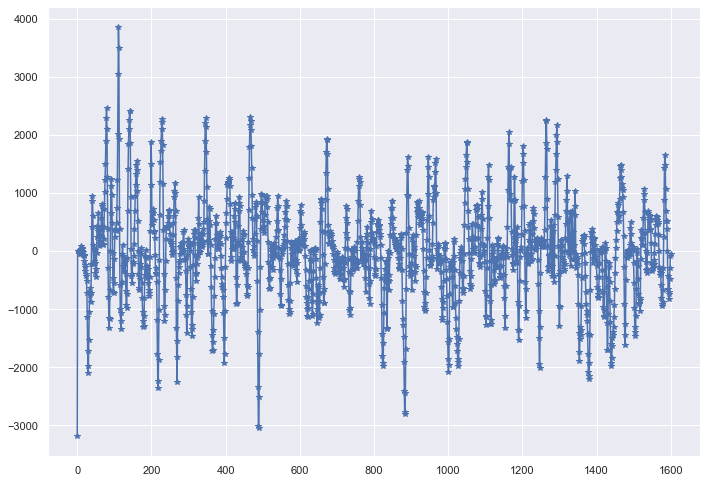

In [14]:
dif = (out)-(ref[0:test_size])
rms_error = (np.sum(dif**2)/(test_size-delay+1))**0.5
print("RMS Error --> ", rms_error)
print(np.max(ref),"<    Range   <",np.min(ref))
print("Normalized RMS Error  -->",100*rms_error/(np.max(ref)-np.min(ref)))

plt.plot(line_refernce,dif,marker="*")

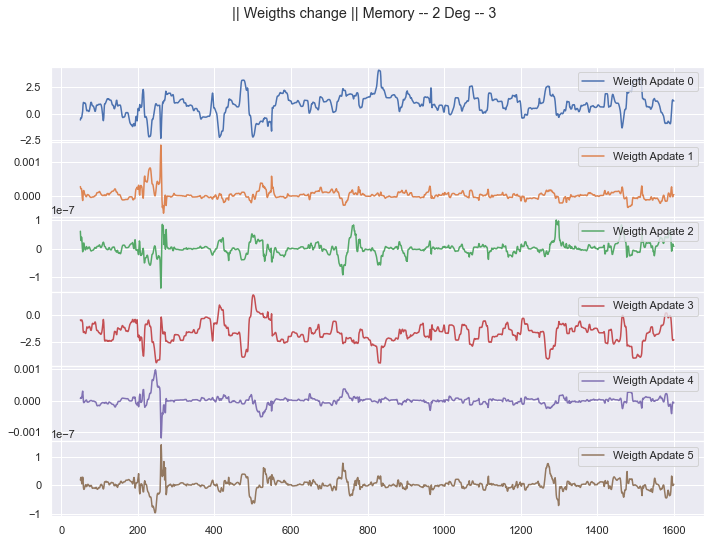

In [20]:
weigth_array = np.squeeze(np.array(weight).T)
weigth_array = np.reshape(weigth_array  ,(np.shape(weigth_array)[0],np.shape(weigth_array)[1]))


fig = plt.figure()
gs = fig.add_gridspec(num_vars,hspace = 0)
axs = gs.subplots(sharex=True)
fig.suptitle("|| Weigths change || Memory -- {} Deg -- {} ".format(mem_len,deg))

for i in range(np.shape(weigth_array)[0]):
    axs[i].plot(line_refernce[50:],weigth_array[i][50:],"C{}".format(i),label="Weigth Apdate {}".format(i))
    axs[i].legend(loc="upper right")
plt.show()
